In [1]:
import itk
print(itk.Version.GetITKVersion())

5.4.0


In [2]:
import vtk
print(vtk.__version__)

9.3.0


In [3]:
import matplotlib.pyplot as plt

## Translation Transform x Regular Step Optimizer

In [4]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

TransformType = itk.TranslationTransform[itk.D, Dimension]
initial_transform = TransformType.New()

OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
metric = MetricType.New()

RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
registration = RegistrationType.New()

In [5]:
# Set up the registration
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetInitialTransform(initial_transform)
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

# Define the optimizer parameters
optimizer.SetLearningRate(4.0)
optimizer.SetMinimumStepLength(0.001)
optimizer.SetNumberOfIterations(200)

In [6]:
# Start the registration process
registration.Update()

In [7]:
# Get the resulting transformation
final_transform = registration.GetTransform()

# Resample the moving image to align with the fixed image
ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
resampler = ResampleFilterType.New()
resampler.SetTransform(final_transform)
resampler.SetInput(moving_image)
resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(fixed_image.GetOrigin())
resampler.SetOutputSpacing(fixed_image.GetSpacing())
resampler.SetOutputDirection(fixed_image.GetDirection())
resampler.SetDefaultPixelValue(0)

# Save the registered image
output_image_path = './Data/case6_gre2_registered.nrrd'
itk.imwrite(resampler.GetOutput(), output_image_path)

print("Registration completed successfully.")

Registration completed successfully.


## Affine Transform x Regular Step Optimizer x Shrink

In [33]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

TransformType = itk.AffineTransform[itk.D, Dimension]
initial_transform = TransformType.New()
initial_transform.SetIdentity()

OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
metric = MetricType.New()

RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
registration = RegistrationType.New()

In [34]:
# Set up the registration
registration.SetMetric(metric)
registration.SetOptimizer(optimizer)
registration.SetInitialTransform(initial_transform)
registration.SetFixedImage(fixed_image)
registration.SetMovingImage(moving_image)

# Define the optimizer parameters
optimizer.SetLearningRate(1.0)
optimizer.SetMinimumStepLength(0.01)
optimizer.SetNumberOfIterations(200)

In [35]:
# Define the shrink factors for each level
shrink_factors_per_level = [4, 2, 1]

# Define the smoothing sigmas for each level
smoothing_sigmas_per_level = [2, 1, 0]

registration.SetShrinkFactorsPerLevel(shrink_factors_per_level)
registration.SetSmoothingSigmasPerLevel(smoothing_sigmas_per_level)

In [36]:
# Start the registration process
registration.Update()

In [37]:
# Get the resulting transformation
final_transform = registration.GetTransform()

# Resample the moving image to align with the fixed image
ResampleFilterType = itk.ResampleImageFilter[MovingImageType, FixedImageType]
resampler = ResampleFilterType.New()
resampler.SetTransform(final_transform)
resampler.SetInput(moving_image)
resampler.SetSize(fixed_image.GetLargestPossibleRegion().GetSize())
resampler.SetOutputOrigin(fixed_image.GetOrigin())
resampler.SetOutputSpacing(fixed_image.GetSpacing())
resampler.SetOutputDirection(fixed_image.GetDirection())
resampler.SetDefaultPixelValue(0)
# resampler = itk.ResampleImageFilter.New(Input=moving_image, Transform=final_transform, UseReferenceImage=True, ReferenceImage=fixed_image)

# Save the registered image
output_image_path = './Data/case6_gre2_registered_aff_shrk_rsmp.nrrd'
itk.imwrite(resampler.GetOutput(), output_image_path)

print("Registration completed successfully.")

Registration completed successfully.


## Rigid Transform

In [ ]:
# Load the fixed and moving images
fixed_image_path = './Data/case6_gre1.nrrd'
moving_image_path = './Data/case6_gre2.nrrd'

fixed_image = itk.imread(fixed_image_path, itk.F)
moving_image = itk.imread(moving_image_path, itk.F)

# Define the registration components
Dimension = 3
FixedImageType = itk.Image[itk.F, Dimension]
MovingImageType = itk.Image[itk.F, Dimension]

TransformType = itk.AffineTransform[itk.D, Dimension]
initial_transform = TransformType.New()
initial_transform.SetIdentity()

OptimizerType = itk.RegularStepGradientDescentOptimizerv4[itk.D]
optimizer = OptimizerType.New()

MetricType = itk.MeanSquaresImageToImageMetricv4[FixedImageType, MovingImageType]
metric = MetricType.New()

RegistrationType = itk.ImageRegistrationMethodv4[FixedImageType, MovingImageType]
registration = RegistrationType.New()

## Visualization

In [12]:
def show(images_path, PixelType = itk.US, n_slice = 100):
    fig = plt.figure(figsize=(10, 10))
    columns = 3
    rows = len(images_path) // columns + 1
    for i in range(0, len(images_path)):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(itk.imread(images_path[i], PixelType)[n_slice, :, :])
    plt.show()

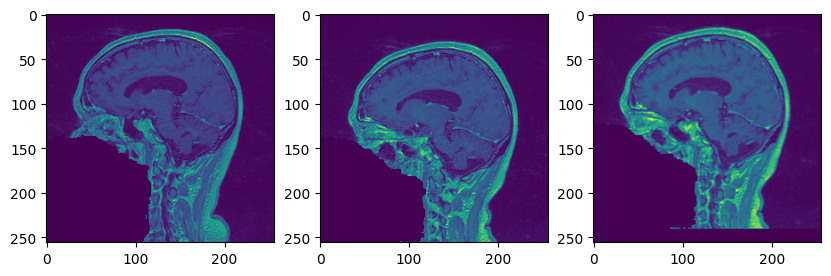

In [13]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered.nrrd"])

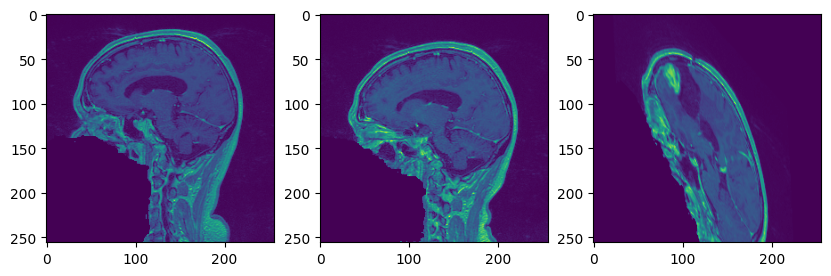

In [20]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_shrk.nrrd"])

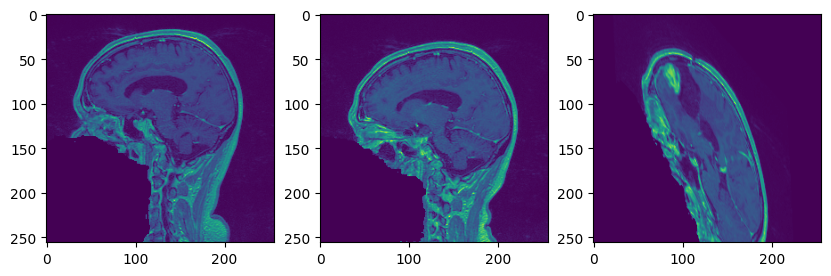

In [38]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_shrk_rsmp.nrrd"])

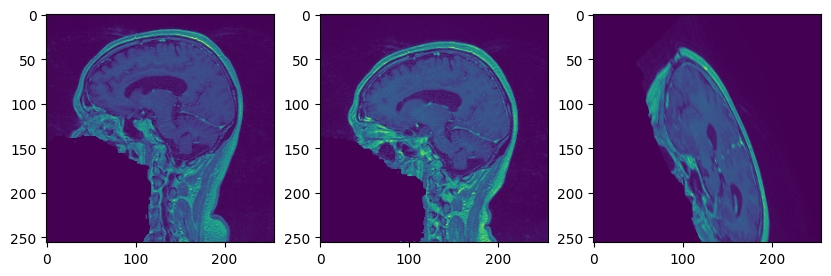

In [32]:
show(["./Data/case6_gre1.nrrd", "./Data/case6_gre2.nrrd", "./Data/case6_gre2_registered_aff_rsmp.nrrd"])